In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
sales = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_sales.csv")

In [344]:
sales["date"] = pd.to_datetime(sales["date"])
sales = sales.sort_values("date")
sales = sales[sales["date"] >= "2020-01-01"]

In [345]:
sales.tail()

,date,year,month,store_id,channel,transactions,revenue,gst_collected,net_revenue,dataset
13146,2024-12-31,2024,12,YYC-DT,IN_STORE,109,3283.48,164.17,3119.31,bookstore_sales
13147,2024-12-31,2024,12,YYC-DT,ONLINE,16,651.08,32.55,618.53,bookstore_sales
13148,2024-12-31,2024,12,YYC-NW,IN_STORE,90,2489.90,124.50,2365.40,bookstore_sales
13149,2024-12-31,2024,12,YYC-NW,ONLINE,18,507.71,25.39,482.32,bookstore_sales
13151,2024-12-31,2024,12,YYC-SE,ONLINE,10,370.54,18.53,352.01,bookstore_sales


In [346]:
sales.drop(columns=["dataset"], inplace=True)

In [347]:
sales["week"] = sales["date"].dt.isocalendar().week.astype(int)

In [348]:
sales_encoded = pd.get_dummies(
    sales,
    columns=["store_id", "channel", "month"]
)

In [349]:
sales_encoded = sales_encoded.sort_values("date")

sales_encoded["lag_1"] = sales.groupby(["store_id", "channel"])["net_revenue"].shift(1)
sales_encoded["lag_7"] = sales.groupby(["store_id", "channel"])["net_revenue"].shift(7)
sales_encoded["lag_30"] = sales.groupby(["store_id", "channel"])["net_revenue"].shift(30)

In [350]:
sales_encoded["roll_7"] = (
    sales.groupby(["store_id", "channel"])["net_revenue"]
      .shift(1)
      .rolling(7)
      .mean()
)

sales_encoded["roll_30"] = (
    sales.groupby(["store_id", "channel"])["net_revenue"]
      .shift(1)
      .rolling(30)
      .mean()
)

In [351]:
sales_encoded = sales_encoded.dropna().reset_index(drop=True)

In [352]:
sales_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10782 non-null  datetime64[ns]
 1   year              10782 non-null  int64         
 2   transactions      10782 non-null  int64         
 3   revenue           10782 non-null  float64       
 4   gst_collected     10782 non-null  float64       
 5   net_revenue       10782 non-null  float64       
 6   week              10782 non-null  int64         
 7   store_id_YYC-DT   10782 non-null  bool          
 8   store_id_YYC-NW   10782 non-null  bool          
 9   store_id_YYC-SE   10782 non-null  bool          
 10  channel_IN_STORE  10782 non-null  bool          
 11  channel_ONLINE    10782 non-null  bool          
 12  month_1           10782 non-null  bool          
 13  month_2           10782 non-null  bool          
 14  month_3           1078

In [353]:
sales_encoded.corr()

,date,year,transactions,revenue,gst_collected,net_revenue,week,store_id_YYC-DT,store_id_YYC-NW,store_id_YYC-SE,...,month_8,month_9,month_10,month_11,month_12,lag_1,lag_7,lag_30,roll_7,roll_30
date,1.000000e+00,9.796997e-01,0.212027,0.221270,0.221271,0.221270,1.460831e-01,-2.637338e-16,1.229926e-15,1.778605e-15,...,1.788664e-02,3.531264e-02,5.401529e-02,7.079980e-02,9.014394e-02,0.221258,0.221259,0.220352,0.548598,0.759957
year,9.796997e-01,1.000000e+00,0.182946,0.191034,0.191035,0.191034,-4.967338e-02,-6.055668e-16,1.514843e-15,1.790711e-15,...,-7.313084e-03,-7.183236e-03,-7.313084e-03,-7.183236e-03,-7.313084e-03,0.191851,0.196170,0.213199,0.476657,0.664859
transactions,2.120267e-01,1.829462e-01,1.000000,0.958736,0.958736,0.958736,1.478944e-01,2.995101e-01,-7.639229e-02,-2.231178e-01,...,-8.478230e-03,-2.118777e-02,4.318158e-03,6.221683e-02,1.548938e-01,0.944473,0.943694,0.911757,0.308633,0.311427
revenue,2.212699e-01,1.910340e-01,0.958736,1.000000,1.000000,1.000000,1.535301e-01,3.098310e-01,-8.213399e-02,-2.276970e-01,...,-9.598283e-03,-1.948385e-02,4.747939e-03,6.699458e-02,1.581704e-01,0.981704,0.979634,0.947030,0.319361,0.321522
gst_collected,2.212713e-01,1.910353e-01,0.958736,1.000000,1.000000,1.000000,1.535304e-01,3.098318e-01,-8.213410e-02,-2.276977e-01,...,-9.598757e-03,-1.948400e-02,4.747382e-03,6.699434e-02,1.581720e-01,0.981703,0.979634,0.947029,0.319363,0.321524
net_revenue,2.212698e-01,1.910339e-01,0.958736,1.000000,1.000000,1.000000,1.535301e-01,3.098309e-01,-8.213398e-02,-2.276969e-01,...,-9.598258e-03,-1.948384e-02,4.747969e-03,6.699459e-02,1.581703e-01,0.981704,0.979634,0.947030,0.319361,0.321522
week,1.460831e-01,-4.967338e-02,0.147894,0.153530,0.153530,0.153530,1.000000e+00,6.314717e-17,1.519949e-17,2.905522e-16,...,1.229164e-01,2.090087e-01,3.026573e-01,3.858985e-01,4.688078e-01,0.153959,0.136286,0.047754,0.374729,0.507387
store_id_YYC-DT,-2.637338e-16,-6.055668e-16,0.299510,0.309831,0.309832,0.309831,6.314717e-17,1.000000e+00,-5.000000e-01,-5.000000e-01,...,4.689511e-17,6.465087e-17,5.363748e-17,6.984081e-19,-7.982890e-17,0.309941,0.310574,0.313230,-0.034500,0.008175
store_id_YYC-NW,1.229926e-15,1.514843e-15,-0.076392,-0.082134,-0.082134,-0.082134,1.519949e-17,-5.000000e-01,1.000000e+00,-5.000000e-01,...,-5.867298e-17,-3.997954e-17,-6.149102e-18,5.754093e-17,8.290224e-17,-0.082180,-0.082411,-0.082858,0.031254,0.023630
store_id_YYC-SE,1.778605e-15,1.790711e-15,-0.223118,-0.227697,-0.227698,-0.227697,2.905522e-16,-5.000000e-01,-5.000000e-01,1.000000e+00,...,-6.759392e-18,9.785611e-17,1.312927e-16,9.777713e-17,1.881348e-16,-0.227761,-0.228164,-0.230372,0.003245,-0.031805


In [354]:
#Coste computacional
#Granularidades ME, W, D
monthly = (
    sales
    .groupby([pd.Grouper(key="date", freq="ME"), "store_id", "channel"], as_index=False)
    .agg({
        "net_revenue": "sum",
        "transactions": "sum"
    })
)

monthly["avg_ticket"] = np.where(
    monthly["transactions"] > 0,
    monthly["net_revenue"] / monthly["transactions"],
    0.0
)

monthly["month"] = monthly["date"].dt.month
monthly["year"] = monthly["date"].dt.year

In [355]:
monthly = monthly.sort_values(["store_id", "channel", "date"])

def add_features(g):
    g = g.copy()
    g["lag_1"] = g["net_revenue"].shift(1)
    g["lag_3"] = g["net_revenue"].shift(3)
    g["lag_6"] = g["net_revenue"].shift(6)
    g["lag_12"] = g["net_revenue"].shift(12)

    g["roll_3"] = g["net_revenue"].shift(1).rolling(3).mean()
    g["roll_6"] = g["net_revenue"].shift(1).rolling(6).mean()
    g["roll_12"] = g["net_revenue"].shift(1).rolling(12).mean()
    return g

monthly_feat = (
    monthly
    .groupby(["store_id", "channel"], group_keys=False)
    .apply(add_features)
    .dropna()
    .reset_index(drop=True)
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_8828\567535975.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(add_features)


In [356]:
monthly.tail()

,date,store_id,channel,net_revenue,transactions,avg_ticket,month,year
335,2024-08-31,YYC-SE,ONLINE,8219.65,250,32.878600,8,2024
341,2024-09-30,YYC-SE,ONLINE,7625.86,254,30.023071,9,2024
347,2024-10-31,YYC-SE,ONLINE,8628.23,290,29.752517,10,2024
353,2024-11-30,YYC-SE,ONLINE,9458.30,305,31.010820,11,2024
359,2024-12-31,YYC-SE,ONLINE,11210.43,389,28.818586,12,2024


In [357]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          360 non-null    datetime64[ns]
 1   store_id      360 non-null    object        
 2   channel       360 non-null    object        
 3   net_revenue   360 non-null    float64       
 4   transactions  360 non-null    int64         
 5   avg_ticket    360 non-null    float64       
 6   month         360 non-null    int32         
 7   year          360 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 22.5+ KB


In [358]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["store_id", "channel", "month"]
num_cols = ["lag_1","lag_3","lag_6","lag_12","roll_3","roll_6","roll_12", "avg_ticket"]

preprocess = ColumnTransformer(
    [
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [359]:
H = 12

max_date = monthly_feat["date"].max()
cutoff = max_date - pd.DateOffset(months=H)

train_df = monthly_feat[monthly_feat["date"] <= cutoff]
test_df  = monthly_feat[monthly_feat["date"] >  cutoff]

X_train = train_df[cat_cols + num_cols]
X_test  = test_df[cat_cols + num_cols]

y_train = train_df["net_revenue"]
y_test  = test_df["net_revenue"]

In [360]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", LinearRegression())
    ]
)

lr_model.fit(X_train, y_train)

pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
mae_lr = mean_absolute_error(y_test, pred_lr)

rmse_lr, mae_lr

(np.float64(2663.131694788701), 1803.4306159091664)

In [361]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", RandomForestRegressor(
            n_estimators=500,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)

rmse_rf, mae_rf

(np.float64(5559.84879141836), 3870.9546930555825)

In [362]:
from xgboost import XGBRegressor

xgb_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            random_state=42,
            n_jobs=-1
        ))
    ]
)

xgb_model.fit(X_train, y_train)

pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
mae_xgb = mean_absolute_error(y_test, pred_xgb)

rmse_xgb, mae_xgb

(np.float64(3898.722242854506), 2610.1426776801213)

In [363]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

xgb_base = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", XGBRegressor(
            objective="reg:squarederror",
            random_state=42,
            n_jobs=-1
        ))
    ]
)

param_dist = {
    "model__n_estimators": [300, 500, 800, 1200],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__max_depth": [2, 3, 4, 6, 8],
    "model__min_child_weight": [1, 3, 5, 8, 12],
    "model__subsample": [0.6, 0.7, 0.8, 1.0],
}

tscv = TimeSeriesSplit(n_splits=3)

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

search.best_params_, -search.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


({'model__subsample': 0.6,
  'model__n_estimators': 800,
  'model__min_child_weight': 3,
  'model__max_depth': 3,
  'model__learning_rate': 0.05},
 np.float64(1864.2116685956796))

In [364]:
best_xgb = search.best_estimator_

pred_best_xgb = best_xgb.predict(X_test)

rmse_best_xgb = np.sqrt(mean_squared_error(y_test, pred_best_xgb))
mae_best_xgb = mean_absolute_error(y_test, pred_best_xgb)

rmse_best_xgb, mae_best_xgb


(np.float64(4048.089855385997), 2742.8883968098953)

In [365]:
def eval_train_test(model, X_train, y_train, X_test, y_test, name="model"):
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)

    rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
    rmse_te = np.sqrt(mean_squared_error(y_test, pred_te))

    mae_tr = mean_absolute_error(y_train, pred_tr)
    mae_te = mean_absolute_error(y_test, pred_te)

    print(f"{name}")
    print(f"  RMSE train: {rmse_tr:,.2f} | test: {rmse_te:,.2f}")
    print(f"  MAE  train: {mae_tr:,.2f} | test: {mae_te:,.2f}")
    return {"model": name, "rmse_train": rmse_tr, "rmse_test": rmse_te, "mae_train": mae_tr, "mae_test": mae_te}


In [366]:
rows = []
rows.append(eval_train_test(lr_model, X_train, y_train, X_test, y_test, "LinearRegression"))
rows.append(eval_train_test(rf_model, X_train, y_train, X_test, y_test, "RandomForest"))
rows.append(eval_train_test(best_xgb, X_train, y_train, X_test, y_test, "XGBoost (default)"))

import pandas as pd
pd.DataFrame(rows)

LinearRegression
  RMSE train: 1,598.26 | test: 2,663.13
  MAE  train: 1,170.19 | test: 1,803.43
RandomForest
  RMSE train: 956.68 | test: 5,559.85
  MAE  train: 609.40 | test: 3,870.95
XGBoost (default)
  RMSE train: 203.83 | test: 4,048.09
  MAE  train: 158.67 | test: 2,742.89


,model,rmse_train,rmse_test,mae_train,mae_test
0,LinearRegression,1598.255289,2663.131695,1170.185598,1803.430616
1,RandomForest,956.680496,5559.848791,609.401997,3870.954693
2,XGBoost (default),203.832882,4048.089855,158.674992,2742.888397


In [367]:
rf_base = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", RandomForestRegressor(
            random_state=42,
            n_jobs=-1
        ))
    ]
)

param_dist = {
    "model__n_estimators": [100, 200, 300, 400, 500],
    "model__max_depth": [None, 2, 4, 6, 8],
}

tscv = TimeSeriesSplit(n_splits=3)

search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,  # 20 es suficiente para entrega
    scoring="neg_mean_absolute_error",
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_rf.fit(X_train, y_train)

search_rf.best_params_, -search_rf.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'model__n_estimators': 100, 'model__max_depth': 8},
 np.float64(2398.4338512887807))

In [368]:
best_rf = search_rf.best_estimator_

res_best_rf = eval_train_test(best_rf, X_train, y_train, X_test, y_test, "RandomForest (tuned)")
res_rf      = eval_train_test(rf_model,  X_train, y_train, X_test, y_test, "RandomForest (baseline)")

pd.DataFrame([res_rf, res_best_rf]).sort_values("rmse_test")

RandomForest (tuned)
  RMSE train: 996.42 | test: 5,556.07
  MAE  train: 640.75 | test: 3,875.66
RandomForest (baseline)
  RMSE train: 956.68 | test: 5,559.85
  MAE  train: 609.40 | test: 3,870.95


,model,rmse_train,rmse_test,mae_train,mae_test
1,RandomForest (tuned),996.416013,5556.067397,640.749615,3875.664722
0,RandomForest (baseline),956.680496,5559.848791,609.401997,3870.954693


Sube el error en train -> baja el overfitting pero el RMSE empeora y en ventas es muy importante.

Aunque el modelo ajustado mostró menor sobreajuste entre entrenamiento y test, su rendimiento en los periodos más recientes fue inferior. Dado que en forecasting el objetivo es maximizar la precisión en el futuro inmediato, se seleccionó el modelo baseline.

In [382]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", Ridge(alpha=0.1))
    ]
)

ridge_model.fit(X_train, y_train)

eval_train_test(ridge_model, X_train, y_train, X_test, y_test, "Ridge")

Ridge
  RMSE train: 1,598.34 | test: 2,670.90
  MAE  train: 1,171.43 | test: 1,812.89


{'model': 'Ridge',
 'rmse_train': np.float64(1598.341439758066),
 'rmse_test': np.float64(2670.9020573616335),
 'mae_train': 1171.4335726792008,
 'mae_test': 1812.8945612870032}

In [390]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", Lasso(alpha=0.01, max_iter=5000))
    ]
)

lasso_model.fit(X_train, y_train)

eval_train_test(lasso_model, X_train, y_train, X_test, y_test, "Lasso")

Lasso
  RMSE train: 1,599.30 | test: 2,648.85
  MAE  train: 1,172.91 | test: 1,800.67


c:\Users\Asier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+08, tolerance: 8.546e+06
  model = cd_fast.enet_coordinate_descent(


{'model': 'Lasso',
 'rmse_train': np.float64(1599.2976985889275),
 'rmse_test': np.float64(2648.845489561649),
 'mae_train': 1172.9094400878605,
 'mae_test': 1800.6746790814882}

In [371]:
from sklearn.linear_model import ElasticNet

enet_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000))
    ]
)

enet_model.fit(X_train, y_train)

eval_train_test(enet_model, X_train, y_train, X_test, y_test, "ElasticNet")

ElasticNet
  RMSE train: 1,605.83 | test: 2,745.58
  MAE  train: 1,184.04 | test: 1,893.12


c:\Users\Asier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.010e+08, tolerance: 8.546e+06
  model = cd_fast.enet_coordinate_descent(


{'model': 'ElasticNet',
 'rmse_train': np.float64(1605.8272913316962),
 'rmse_test': np.float64(2745.5792303629787),
 'mae_train': 1184.0361716162706,
 'mae_test': 1893.1166802419766}

Nos quedamos con LinearRegression

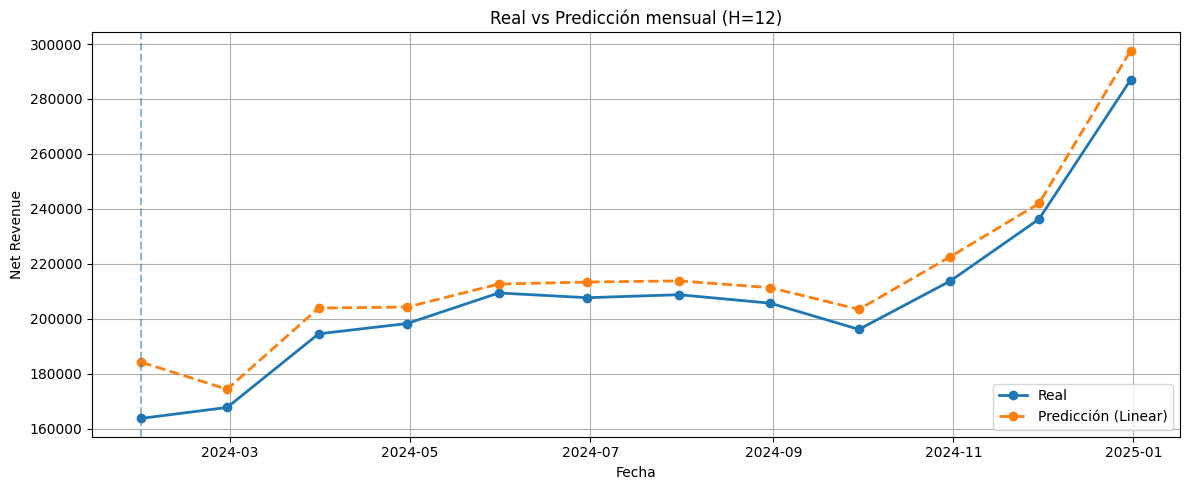

In [372]:
# montar df con fecha + real + pred (mismo orden que X_test porque vienen de test_df)
plot_df = test_df[["date"]].copy()
plot_df["real"] = y_test.values
plot_df["pred"] = pred_lr

# agregar por fecha (total net_revenue por mes)
plot_df = plot_df.groupby("date", as_index=False)[["real", "pred"]].sum()

plt.figure(figsize=(12,5))

plt.plot(
    plot_df["date"],
    plot_df["real"],
    marker="o",
    linestyle="-",
    label="Real",
    linewidth=2
)

plt.plot(
    plot_df["date"],
    plot_df["pred"],
    marker="o",
    linestyle="--",
    label="Predicción (Linear)",
    linewidth=2
)

plt.axvline(
    plot_df["date"].min(),
    linestyle="--",
    alpha=0.5
)

plt.title(f"Real vs Predicción mensual (H={H})")
plt.xlabel("Fecha")
plt.ylabel("Net Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [373]:
X = monthly_feat[cat_cols + num_cols]
y = monthly_feat["net_revenue"]

In [374]:
final_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", LinearRegression())
    ]
)

final_model.fit(X, y)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [375]:
import joblib
joblib.dump(final_model, "monthly_linear_model.joblib")

['monthly_linear_model.joblib']

In [376]:
import pandas as pd

def forecast_12m_simple(monthly, model, H=12):
    """
    monthly debe tener: date, store_id, channel, net_revenue
    (agregado a nivel mensual REAL: freq='ME')
    """
    # Histórico base
    extended = monthly[["date","store_id","channel","net_revenue", "avg_ticket"]].copy()
    extended = extended.sort_values(["store_id","channel","date"])

    last_date = extended["date"].max()
    future_dates = pd.date_range(last_date + pd.offsets.MonthEnd(1), periods=H, freq="ME")

    preds = []

    for d in future_dates:
        # Crear filas futuras vacías (una por store_id+channel)
        combos = extended[["store_id","channel"]].drop_duplicates()
        step = combos.assign(date=d)
        step["month"] = step["date"].dt.month

        # Unir para calcular lags/rollings por grupo
        tmp = pd.concat([extended, step.rename(columns={"month":"_m"})], ignore_index=True)
        tmp = tmp.sort_values(["store_id","channel","date"])

        # Calcular features SOLO para el último registro de cada grupo (que es el mes d)
        def last_features(g):
            y = g["net_revenue"]
            last_avg_ticket = float(g["avg_ticket"].iloc[-2])  # penúltimo = último conocido (antes del futuro)
            # últimos valores disponibles (incluyen predicciones anteriores)
            return pd.Series({
                "lag_1":  y.iloc[-2],
                "lag_3":  y.iloc[-4],
                "lag_6":  y.iloc[-7],
                "lag_12": y.iloc[-13],
                "roll_3":  y.iloc[-4:-1].mean(),
                "roll_6":  y.iloc[-7:-1].mean(),
                "roll_12": y.iloc[-13:-1].mean(),
                "avg_ticket": last_avg_ticket,
            })

        feat = (
            tmp.groupby(["store_id","channel"], sort=False)
               .apply(last_features)
               .reset_index()
        )

        X_step = feat.copy()
        X_step["month"] = d.month

        # OJO: aquí deben coincidir con tus columnas del pipeline
        X_step = X_step[["store_id","channel","month","lag_1","lag_3","lag_6","lag_12","roll_3","roll_6","roll_12", "avg_ticket"]]

        y_pred = model.predict(X_step)

        # Guardar y “alimentar” el histórico
        out = X_step[["store_id","channel"]].copy()
        out["avg_ticket"] = X_step["avg_ticket"].values
        out["date"] = d
        out["net_revenue_pred"] = y_pred
        preds.append(out)

        extended = pd.concat(
            [extended, out.rename(columns={"net_revenue_pred":"net_revenue"})[["date","store_id","channel","net_revenue", "avg_ticket"]]],
            ignore_index=True
        ).sort_values(["store_id","channel","date"])

    future_rows = pd.concat(preds, ignore_index=True)
    future_total = future_rows.groupby("date", as_index=False)["net_revenue_pred"].sum()

    return future_rows, future_total

In [377]:
future_rows, future_total = forecast_12m_simple(monthly, final_model, H=12)

C:\Users\Asier\AppData\Local\Temp\ipykernel_8828\1240914726.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(last_features)
C:\Users\Asier\AppData\Local\Temp\ipykernel_8828\1240914726.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(last_features)
C:\Users\Asier\AppData\Local\Temp\ipykernel_8828\1240914726.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavi

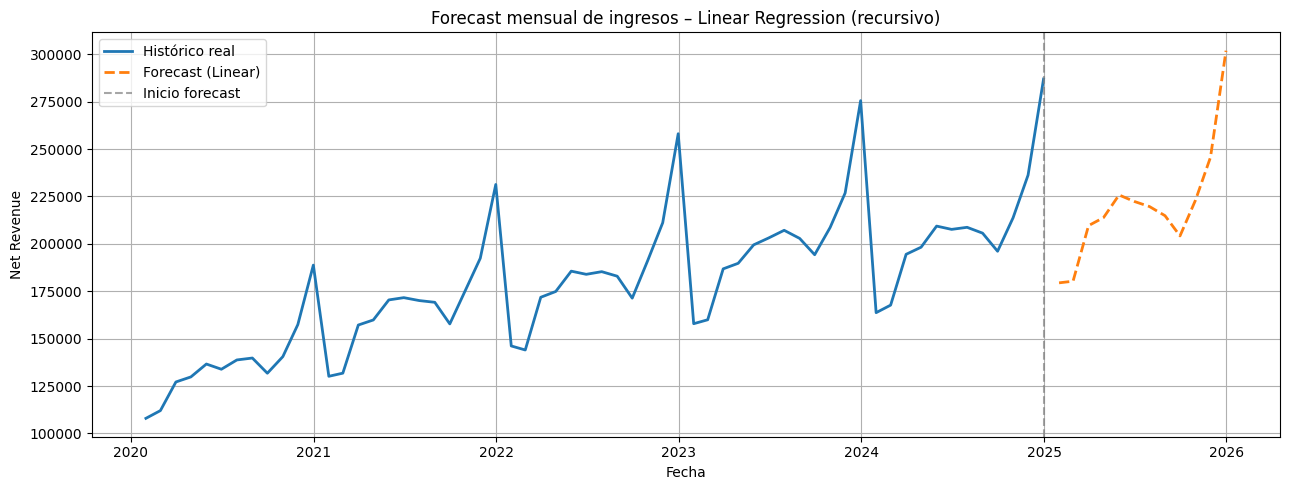

In [378]:
import matplotlib.pyplot as plt

historical = (
    monthly.groupby("date", as_index=False)["net_revenue"]
    .sum()
    .sort_values("date")
)

plt.figure(figsize=(13,5))
plt.plot(historical["date"], historical["net_revenue"], label="Histórico real", linewidth=2)
plt.plot(future_total["date"], future_total["net_revenue_pred"], label="Forecast (Linear)", linewidth=2, linestyle="--")
plt.axvline(historical["date"].max(), linestyle="--", color="gray", alpha=0.7, label="Inicio forecast")
plt.title("Forecast mensual de ingresos – Linear Regression (recursivo)")
plt.xlabel("Fecha")
plt.ylabel("Net Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [379]:
future_total

,date,net_revenue_pred
0,2025-01-31,179438.782409
1,2025-02-28,180301.088148
2,2025-03-31,209620.202389
3,2025-04-30,213841.836683
4,2025-05-31,225780.480563
5,2025-06-30,222410.450839
6,2025-07-31,219658.633086
7,2025-08-31,214852.401037
8,2025-09-30,204188.812915
9,2025-10-31,223058.003307
